In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,68,86
1,2,Female,56,22,57
2,3,Male,66,41,29
3,4,Male,69,41,78
4,5,Male,49,112,92


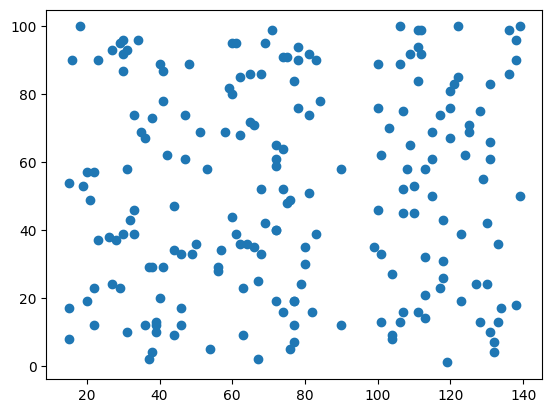

In [3]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values #extract the only two columns 
print(X)

[[ 68  86]
 [ 22  57]
 [ 41  29]
 [ 41  78]
 [112  92]
 [ 35  69]
 [ 44  47]
 [111  94]
 [ 42  62]
 [125  69]
 [ 78  76]
 [111  16]
 [ 83  90]
 [138  90]
 [ 75  48]
 [ 62  85]
 [ 33  39]
 [ 18 100]
 [ 49  33]
 [ 78  94]
 [ 63  23]
 [ 31  10]
 [ 58  69]
 [106 100]
 [ 44  34]
 [107  52]
 [ 60  95]
 [131  10]
 [ 20  19]
 [113  58]
 [138  96]
 [119   1]
 [ 51  69]
 [ 38   4]
 [107  16]
 [127  24]
 [ 60  80]
 [ 67   2]
 [109  92]
 [113  32]
 [ 74  91]
 [111  84]
 [130  24]
 [ 77  12]
 [139  50]
 [ 99  35]
 [ 46  33]
 [101  33]
 [ 47  61]
 [ 81  51]
 [ 32  43]
 [ 39  12]
 [120  67]
 [109  65]
 [ 68  33]
 [ 72  40]
 [ 81  74]
 [118  43]
 [ 60  44]
 [ 38  29]
 [128  13]
 [ 46  12]
 [ 61  95]
 [100  46]
 [ 37   2]
 [ 80  35]
 [ 41  87]
 [120  81]
 [ 16  90]
 [104   8]
 [ 31  93]
 [118  26]
 [ 47  74]
 [ 23  90]
 [ 57  34]
 [132   7]
 [ 62  68]
 [ 53  58]
 [107  75]
 [ 56  29]
 [133  36]
 [ 40  89]
 [113  21]
 [ 64  36]
 [ 39  10]
 [ 38  73]
 [ 27  24]
 [ 74  64]
 [136  99]
 [ 21  49]
 [ 71  99]

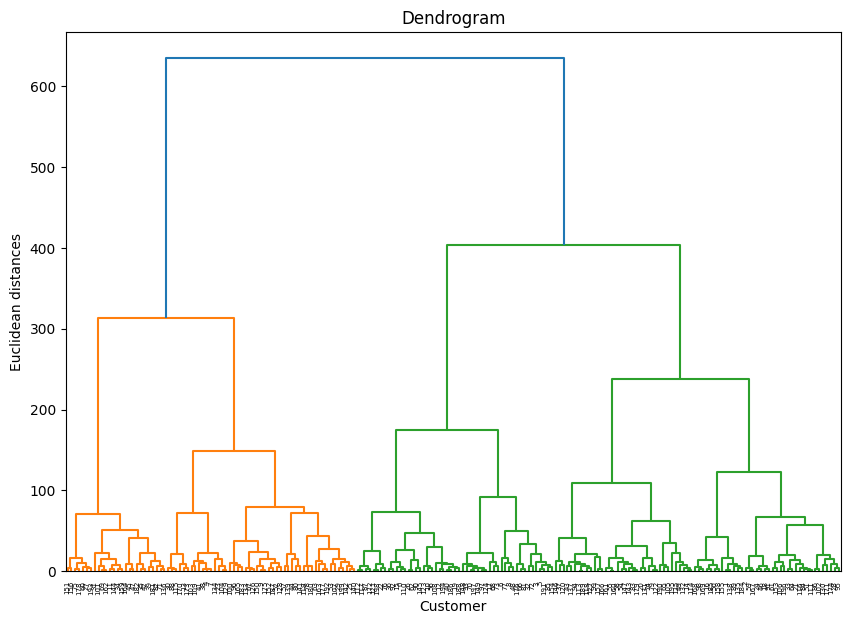

In [5]:
import scipy.cluster.hierarchy as sch
#making of dendrogram ushing the scipy 

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

agloCluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')#n_cluster = 2 we get from dindrogram
label = agloCluster.fit_predict(X) 

In [11]:
label

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1])

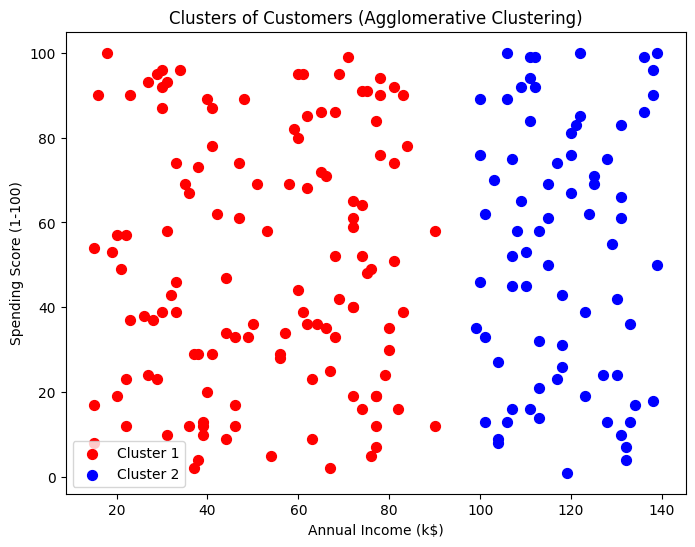

In [15]:
# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X[label == 0, 0], X[label == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[label == 1, 0], X[label == 1, 1], s=50, c='blue', label='Cluster 2')

plt.title("Clusters of Customers (Agglomerative Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()